# Practicing IBM Data Science Course
Lab: Exploring Data using IBM Cloud Gallery

## UCI: Forest fires
Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.
<br> You can access the data by accessing the link below
<br> https://archive.ics.uci.edu/dataset/162/forest+fires

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('Datasets/forest+fires/forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<b>Attribute information</b>:
* X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
* Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
* month - month of the year: "jan" to "dec"
* day - day of the week: "mon" to "sun"
* FFMC - Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20. The indicator turns the fire into a burning flame
* DMC - Duff Moisture Code index from the FWI system: 1.1 to 291.3. 
* DC - Drought Code index from the FWI system: 7.9 to 860.6. The indicator turns the flame into smoldering and smog
* ISI - Inital Spread Index from the FWI system: 0.0 to 56.10. How the burning flame would spread, affected by the <b>wind and FFMC</b>
* temp - temperature in Celsius degrees: 2.2 to 33.30
* RH - relative humidity in %: 15.0 to 100
* wind - wind speed in km/h: 0.40 to 9.40
* rain - outside rain in mm/m2 : 0.0 to 6.4
* area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [74]:
num_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

### EDA

In [7]:
data.month.value_counts()

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

In [9]:
data.day.value_counts()

day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64

In [27]:
data['month_cat'] = data['month'].map(
    {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
)

In [63]:
data['day_cat'] = data['day'].map(
    {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
)

In [64]:
data.day_cat.value_counts()

day_cat
7    95
5    85
6    84
1    74
2    64
4    61
3    54
Name: count, dtype: int64

<Axes: >

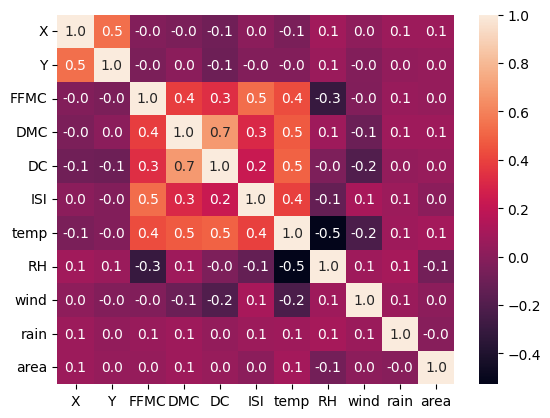

In [76]:
sns.heatmap(data[num_features].corr(), annot=True, fmt=".1f")

variable that quite correlated to the area: none <br>
variable that quite correlated with each other: FFMC, DMC, DC, ISI, temp, RH

<Axes: xlabel='FFMC', ylabel='Density'>

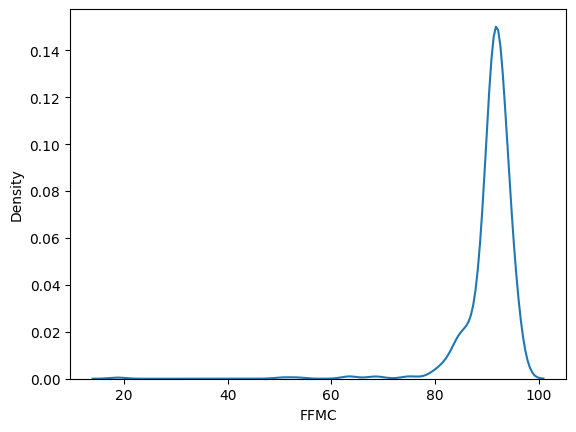

In [59]:
sns.kdeplot(data=data, x='FFMC')

<Axes: xlabel='FFMC', ylabel='Density'>

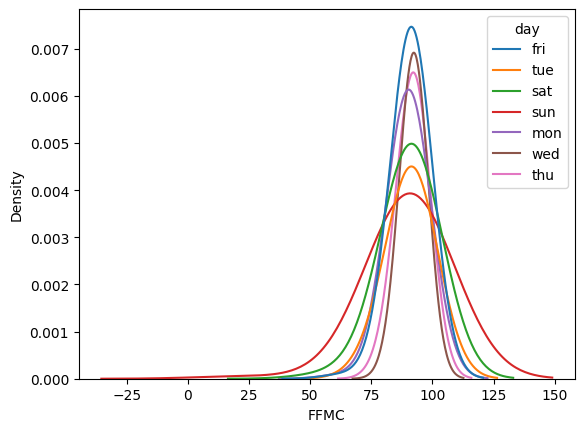

In [61]:
sns.kdeplot(data=data, x='FFMC', bw_adjust=5,  hue='day')

<Axes: xlabel='month_cat', ylabel='FFMC'>

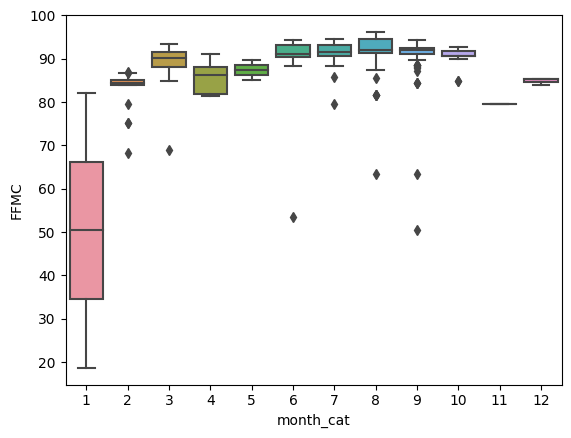

In [83]:
sns.boxplot(data=data, x='month_cat', y='FFMC')

<Axes: xlabel='day', ylabel='FFMC'>

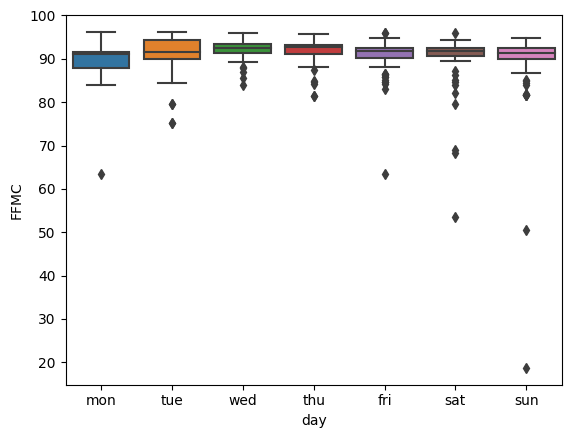

In [104]:
sns.boxplot(data=data, x='day', y='FFMC', order=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])

In [109]:
month_order = ['jan',  'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon',  'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

<Axes: xlabel='day', ylabel='FFMC'>

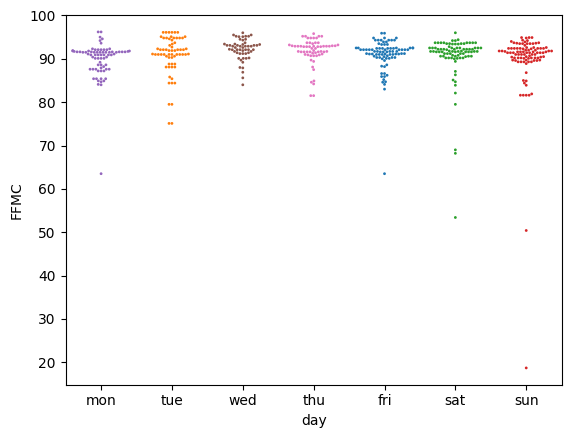

In [110]:
sns.swarmplot(data=data, x='day', y='FFMC', hue='day', legend=False, order=day_order, size=2)

<Axes: xlabel='day', ylabel='DMC'>

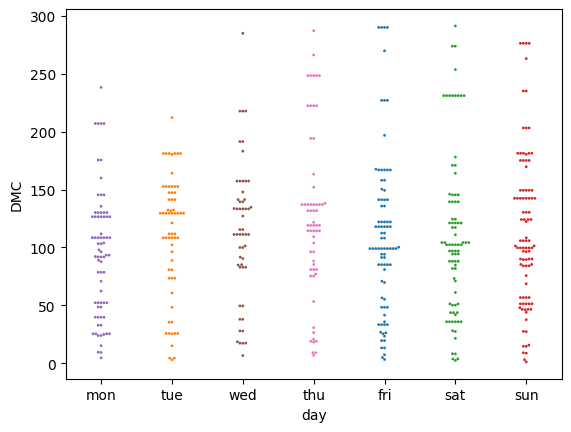

In [111]:
sns.swarmplot(data=data, x='day', y='DMC', hue='day', legend=False, order=day_order, size=2)

<Axes: xlabel='month', ylabel='DMC'>

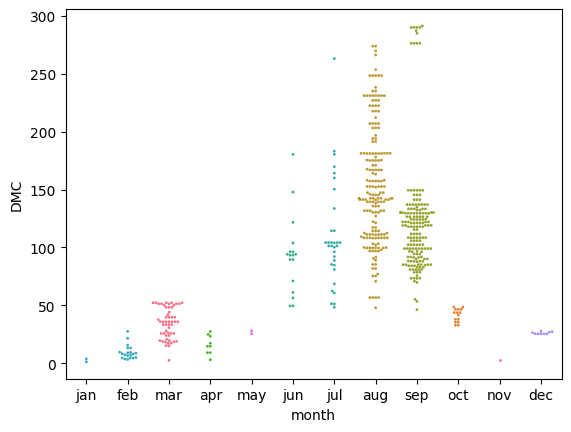

In [112]:
sns.swarmplot(data=data, x='month', y='DMC', hue='month', legend=False, 
              order=month_order, size=2)

<Axes: xlabel='month', ylabel='DC'>

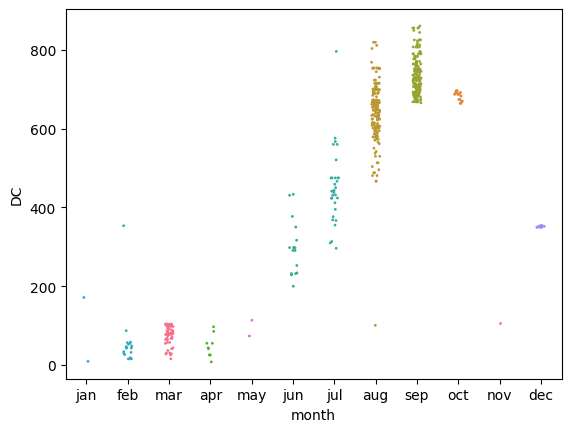

In [117]:
sns.stripplot(data=data, x='month', y='DC', hue='month', legend=False, 
              order=month_order, size=2)

<Axes: xlabel='month', ylabel='ISI'>

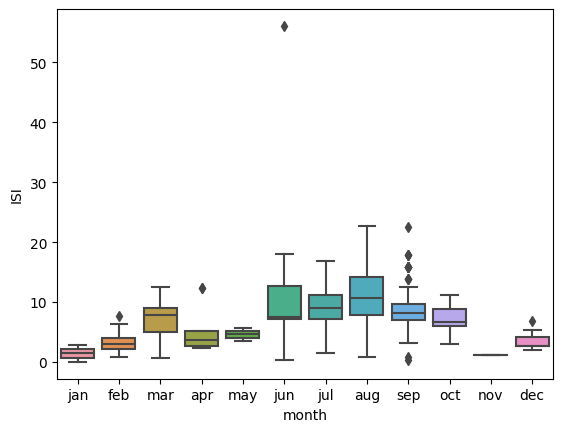

In [124]:
sns.boxplot(data=data, x='month', y='ISI',order=month_order)

<Axes: xlabel='month', ylabel='RH'>

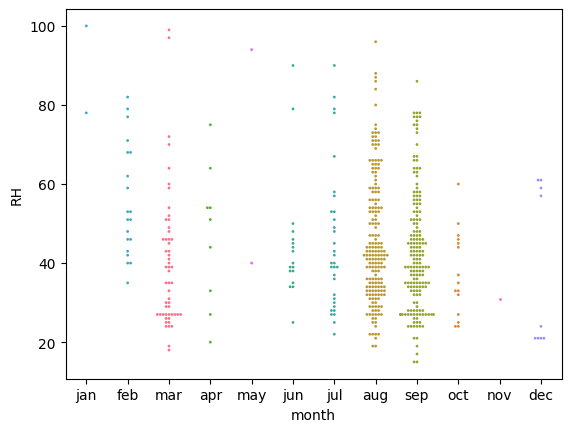

In [130]:
sns.swarmplot(data=data, x='month', y='RH', hue='month', legend=False, 
              order=month_order, size=2)

<Axes: xlabel='month', ylabel='temp'>

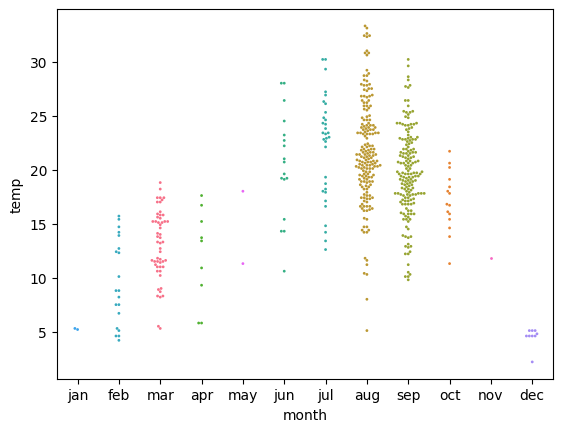

In [131]:
sns.swarmplot(data=data, x='month', y='temp', hue='month', legend=False, 
              order=month_order, size=2)

June-Sept: dry. <br> Graph shows higher temperature at that time